In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
data = pd.read_csv("../input/logistic-regression/Social_Network_Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
l = LabelEncoder()
data["Gender"] = l.fit_transform(data["Gender"])

In [6]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


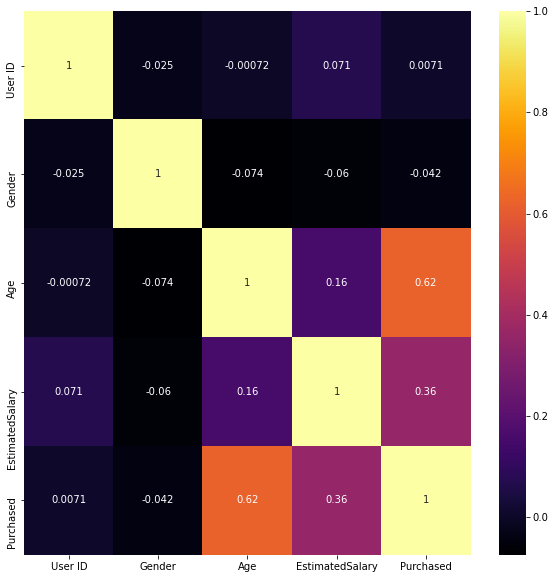

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

In [8]:
data.drop(labels = ['User ID','Gender'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
sum(data.duplicated())

33

In [10]:
data.drop_duplicates(keep = False, inplace = True)

In [11]:
sum(data.duplicated())

0

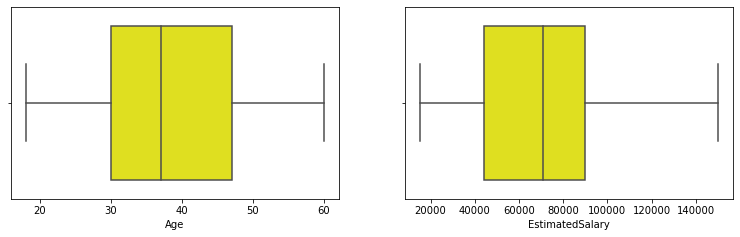

In [12]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(data['Age'],color='yellow')
plt.subplot(3,3,2)
sns.boxplot(data['EstimatedSalary'], color='yellow')

plt.show()

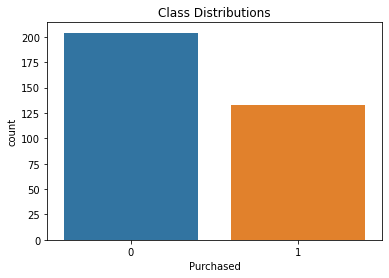

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot('Purchased', data=data)
plt.title('Class Distributions')
plt.show()

In [14]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [15]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [17]:
model = LogisticRegression()
model.fit(train_x , train_y)

LogisticRegression()

In [18]:
pred = model.predict(test_x)

In [19]:
print(confusion_matrix(test_y , pred))

[[37  4]
 [ 7 20]]


In [22]:
print(accuracy_score(test_y , pred))

0.8382352941176471


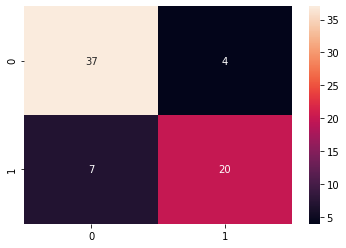

In [23]:
sns.heatmap(confusion_matrix(test_y , pred) , annot = True)